### EDA

1) Performing pre-processing and EDA on the data and splitting it into training and testing datasets.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("Real estate.csv")

In [3]:
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
# We can observe that there are no null values and no categorical data
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


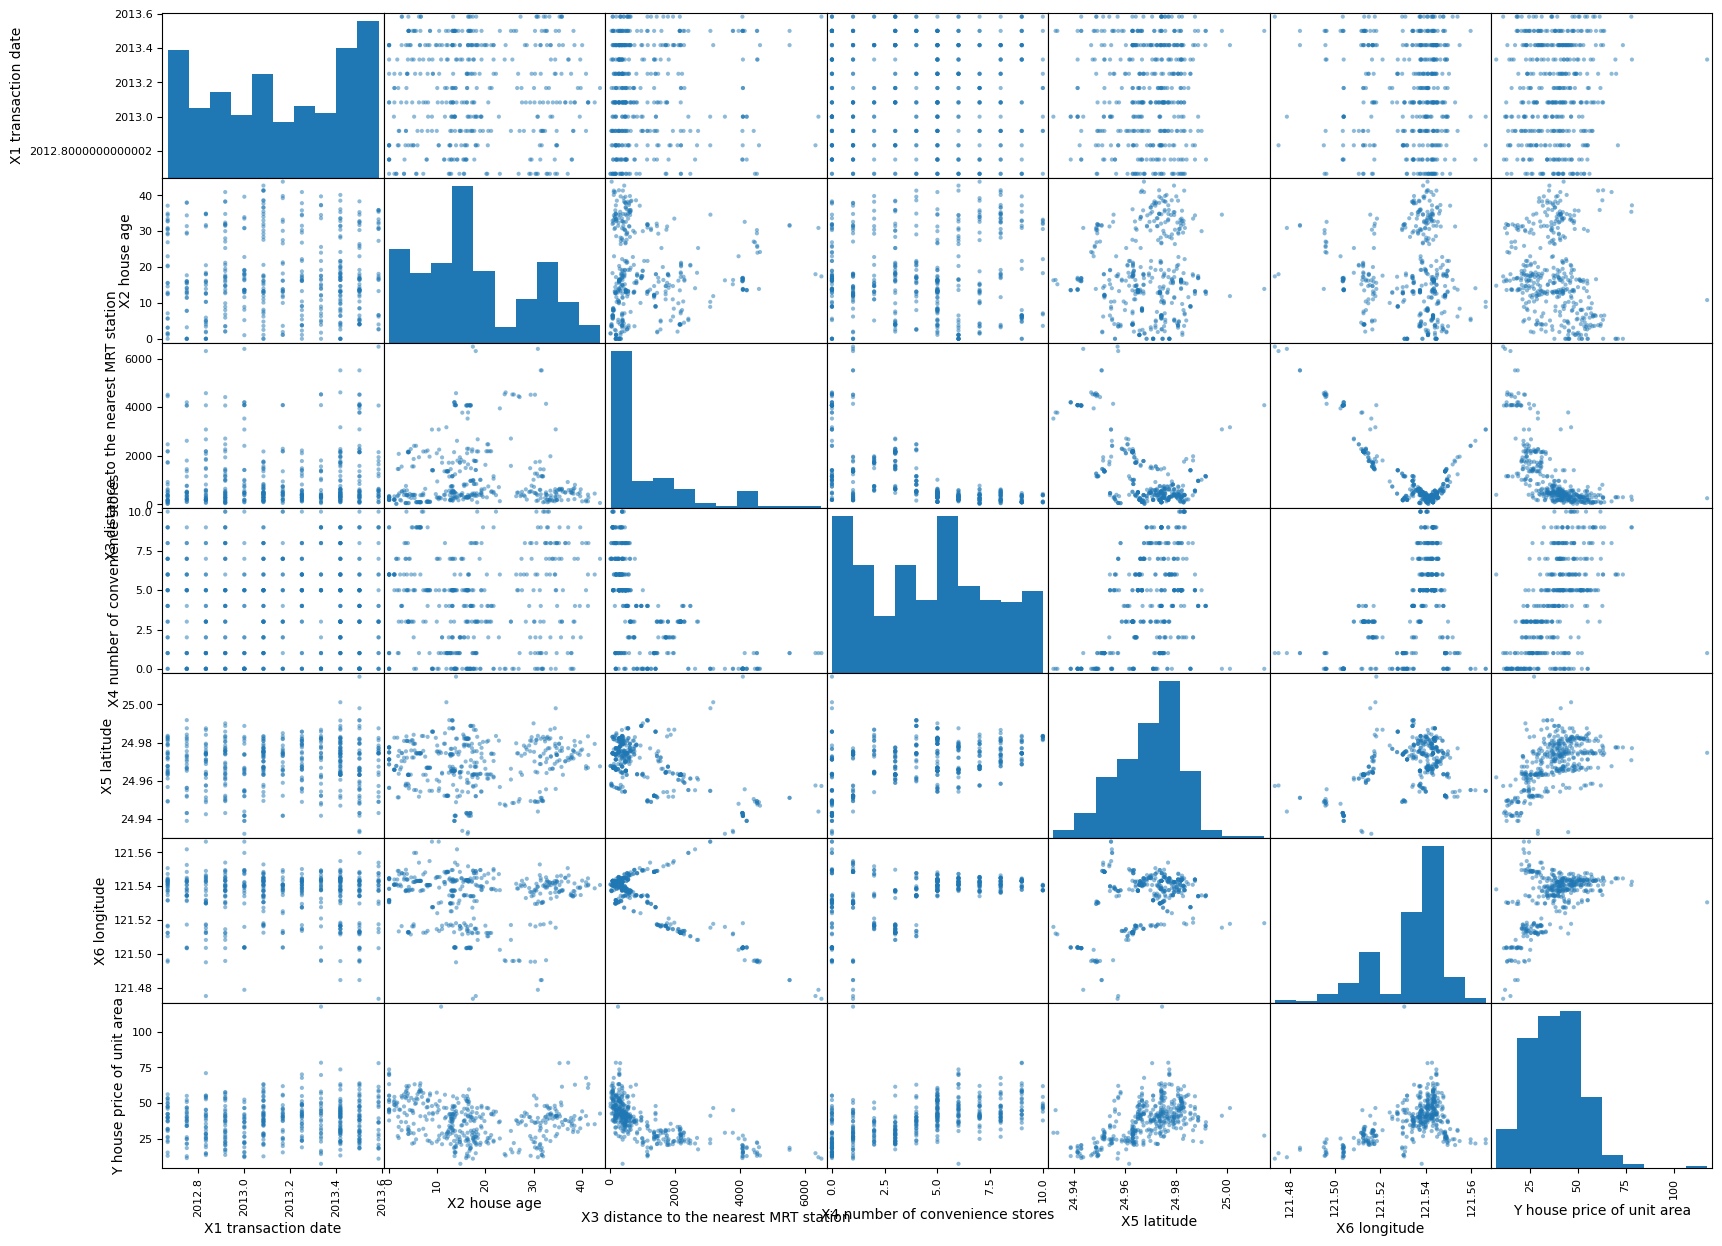

In [7]:
#data is not normally distributed 
from pandas.plotting import scatter_matrix

features = df.columns[1:]
scatter_matrix(df[features], figsize=(20,15))
plt.show()

In [8]:
df.corr()['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

In [9]:
# increase in  number of convinice stores, latitude and logitude causes increase in 
# increase in house age and distance to MRT decreases y
df = df.drop("No", axis=1) #dont need it since no information provided.

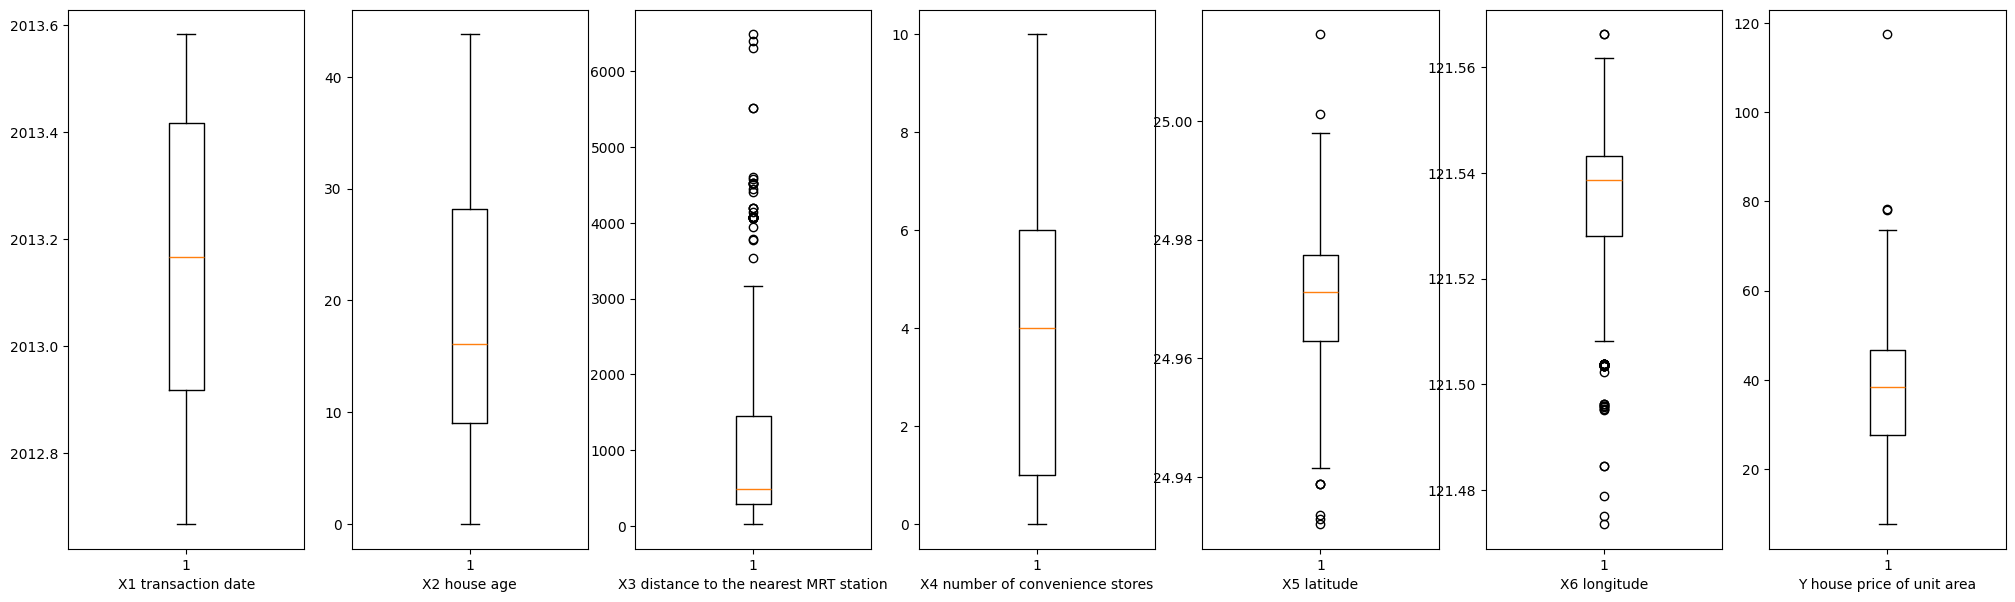

In [10]:
features = df.columns.tolist()
fig, axs = plt.subplots(1, len(features), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(features)),features):
    axs[i].boxplot(df[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

In [11]:
# lots of outliers seen in the features X3 and X6
cols = [
 'X3 distance to the nearest MRT station',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']
for col in cols:
    q01 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df= df[(df[col]>q01) & (df[col]<q99)]

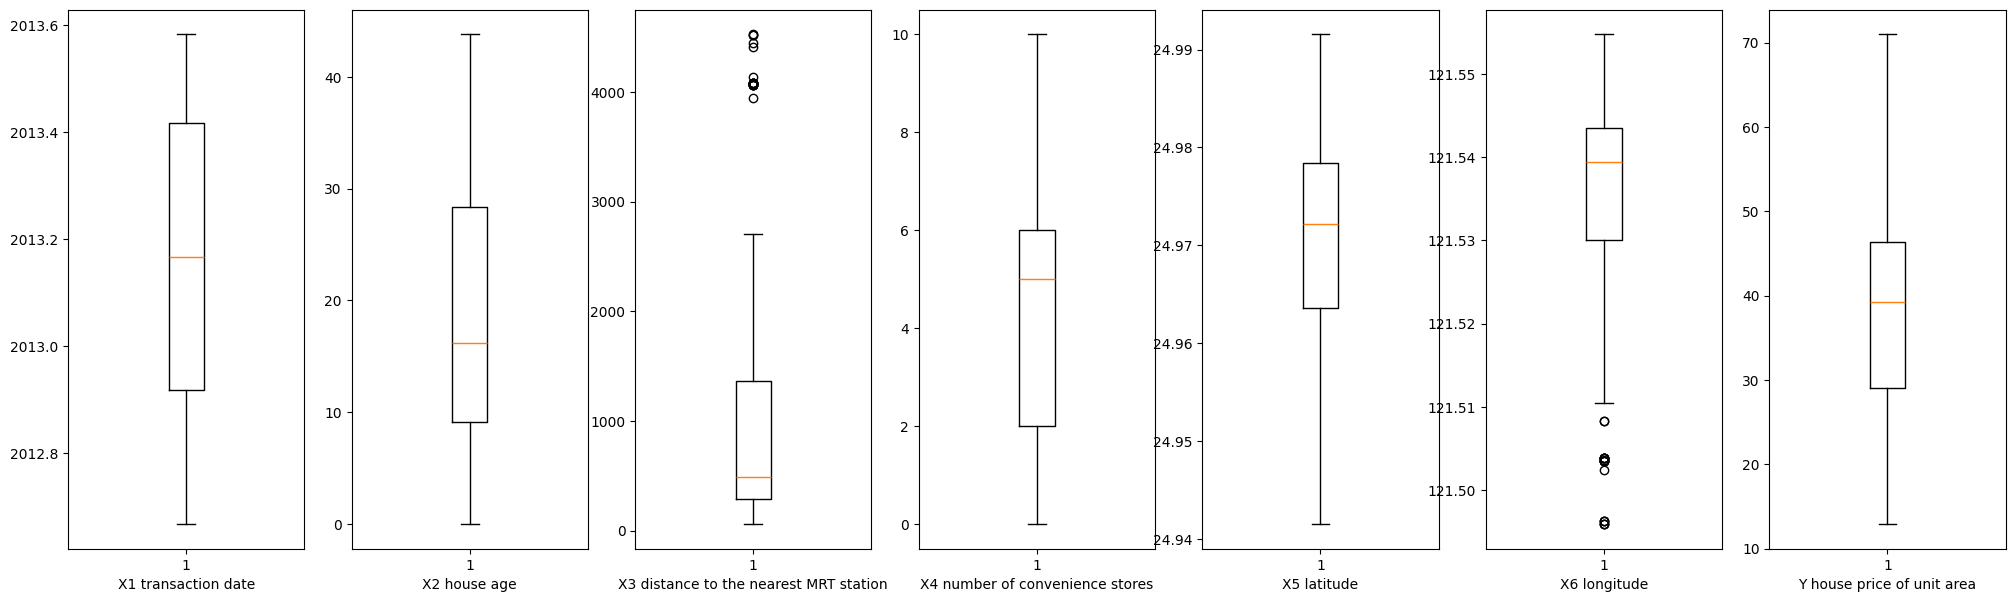

In [12]:
features = df.columns.tolist()
fig, axs = plt.subplots(1, len(features), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(features)),features):
    axs[i].boxplot(df[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

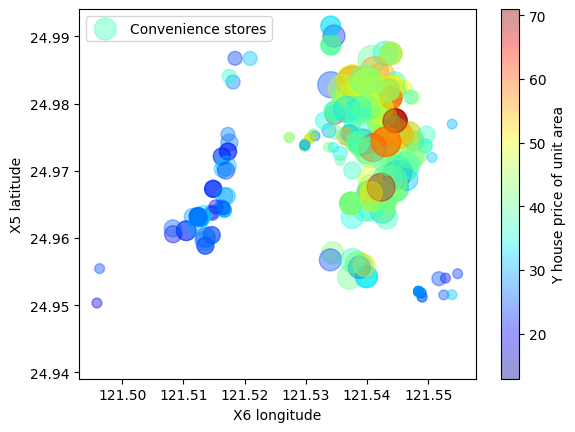

In [13]:
df.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=df["X4 number of convenience stores"]*50,
       label="Convenience stores",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

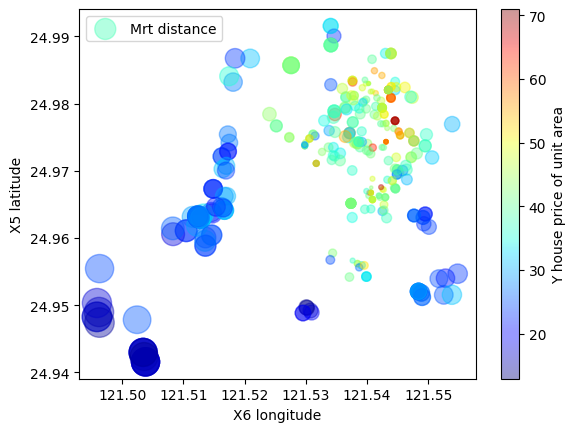

In [14]:
df.plot(kind="scatter",x="X6 longitude",y="X5 latitude", alpha=0.4, s=df["X3 distance to the nearest MRT station"]/10,
       label="Mrt distance",c="Y house price of unit area", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()
plt.show()

In [15]:
# both plot shows that price is higher at longitude 121.54. Mrt distance and
# number of convenice stores substantially influence the price hike.

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,-0.014193,0.076686,0.009791,-0.010700,-0.027831,0.057596
X2 house age,-0.014193,1.000000,-0.022688,0.071075,0.058415,0.014588,-0.225291
X3 distance to the nearest MRT station,0.076686,-0.022688,1.000000,-0.566555,-0.623837,-0.811425,-0.707123
X4 number of convenience stores,0.009791,0.071075,-0.566555,1.000000,0.452006,0.442353,0.574470
X5 latitude,-0.010700,0.058415,-0.623837,0.452006,1.000000,0.402769,0.595743
X6 longitude,-0.027831,0.014588,-0.811425,0.442353,0.402769,1.000000,0.558188
Y house price of unit area,0.057596,-0.225291,-0.707123,0.574470,0.595743,0.558188,1.000000


In [17]:
# X3 is highly negatively correlated with X6 and Y. The scales of data are
# very different. It is better to either normalise or standardize it.
# df = df.drop("X1 transaction date", axis=1)

In [18]:
def normalize(data):
    max_value = max(data)
    min_value = min(data)
    for i in range(len(data)):
        data[i]= (data[i] - min_value) / (max_value - min_value)
    return data

In [19]:
df2 = df.copy()
df2 = df2.astype({'X4 number of convenience stores':'float'}) 
for column in df2:
    normalize((df2[column].values))

df2.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,0.526294,0.409182,0.190105,0.427273,0.570896,0.657330,0.438397
std,0.304019,0.261681,0.221264,0.285868,0.218665,0.223912,0.205618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272926,0.207763,0.051841,0.200000,0.440712,0.580972,0.277108
50%,0.545852,0.369863,0.096589,0.500000,0.613477,0.738802,0.452668
75%,0.818777,0.647260,0.291392,0.600000,0.736903,0.807771,0.575731
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
def standardize(data):
    mean = data.mean()
    std = data.std()
    for i in range(len(data)):
        data[i]= (data[i] - mean) / std
    return data

In [21]:
df3 = df.copy()
df3 = df3.astype({'X4 number of convenience stores':'float'}) 
for column in df3:
    standardize((df3[column].values))

df3.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02,3.740000e+02
mean,1.040541e-12,1.899847e-17,-1.009294e-16,9.261754e-17,4.784004e-13,2.652234e-13,-3.134747e-16
std,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00,1.001340e+00
min,-1.733440e+00,-1.565765e+00,-8.603271e-01,-1.496651e+00,-2.614323e+00,-2.939591e+00,-2.134953e+00
25%,-8.345124e-01,-7.707471e-01,-6.257174e-01,-7.960910e-01,-5.961564e-01,-3.414729e-01,-7.854598e-01
50%,6.441512e-02,-1.504586e-01,-4.232105e-01,2.547491e-01,1.949940e-01,3.643457e-01,6.949841e-02
75%,9.633426e-01,9.110209e-01,4.583785e-01,6.050291e-01,7.601996e-01,6.727737e-01,6.688073e-01
max,1.560230e+00,2.260804e+00,3.665215e+00,2.006149e+00,1.965010e+00,1.532427e+00,2.734956e+00


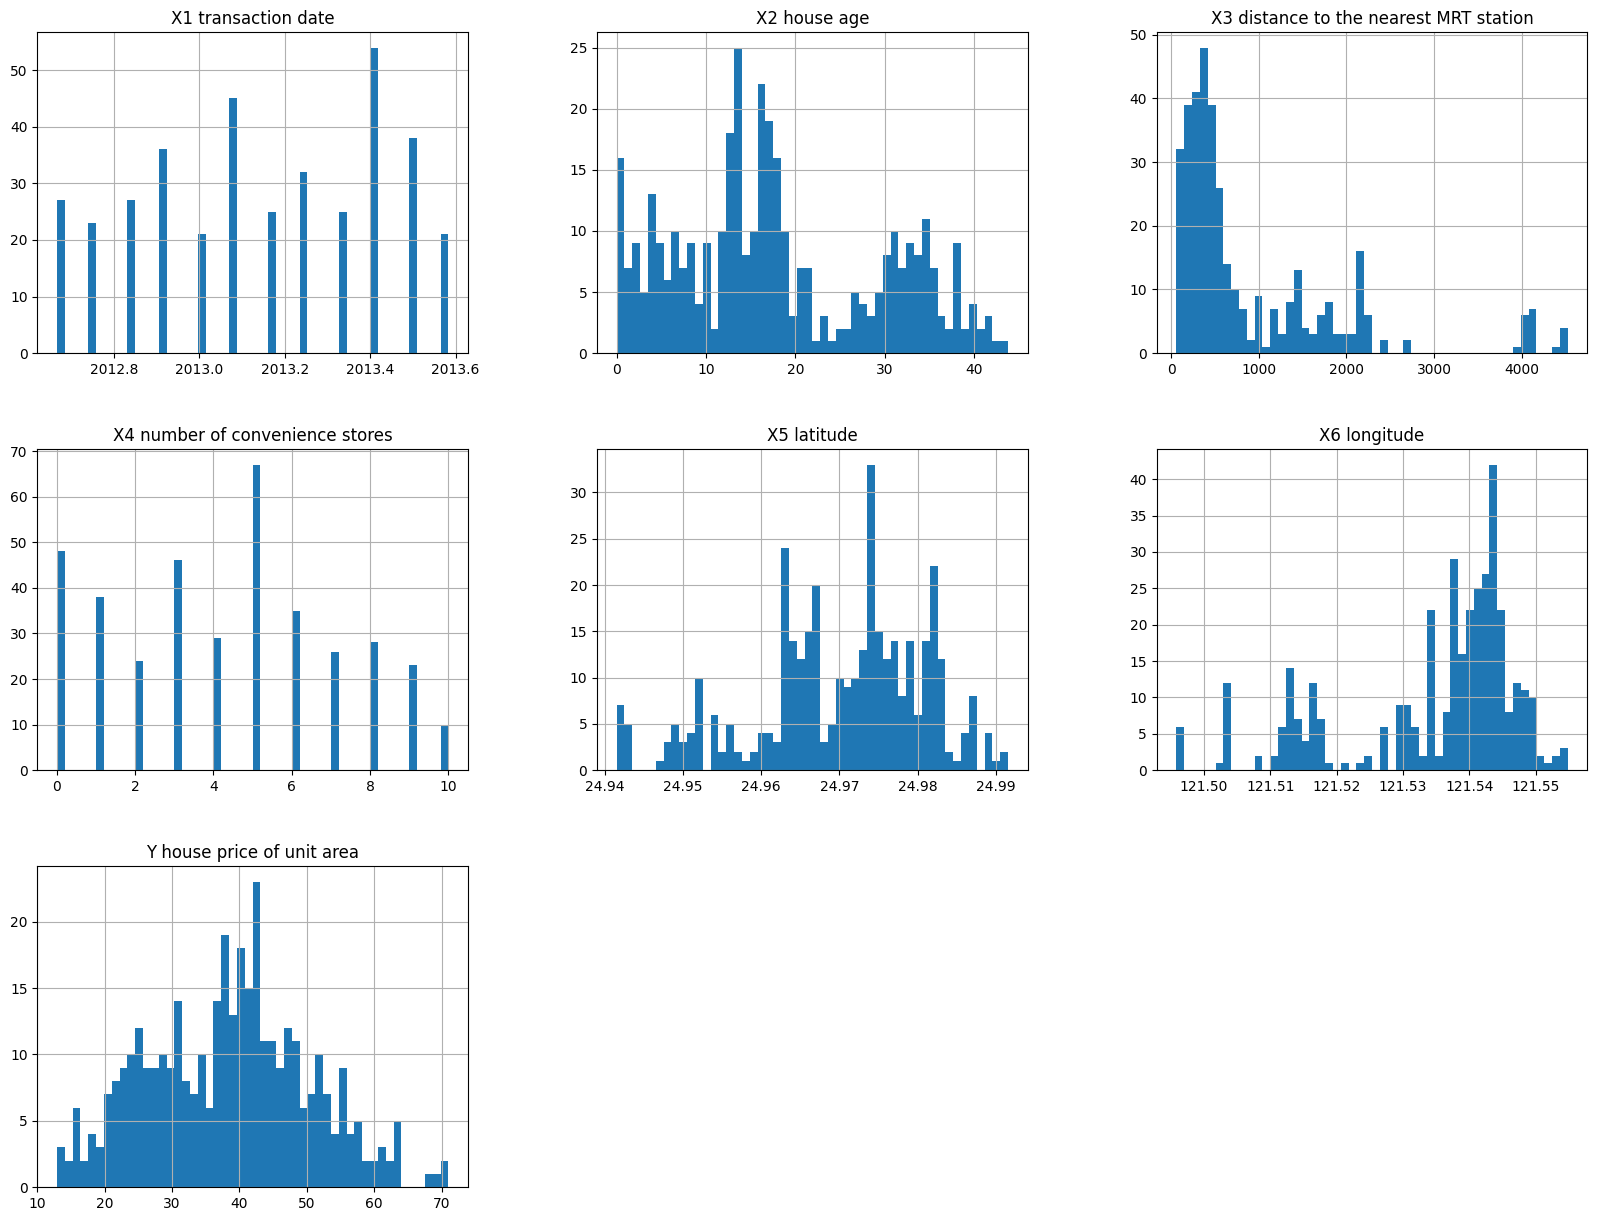

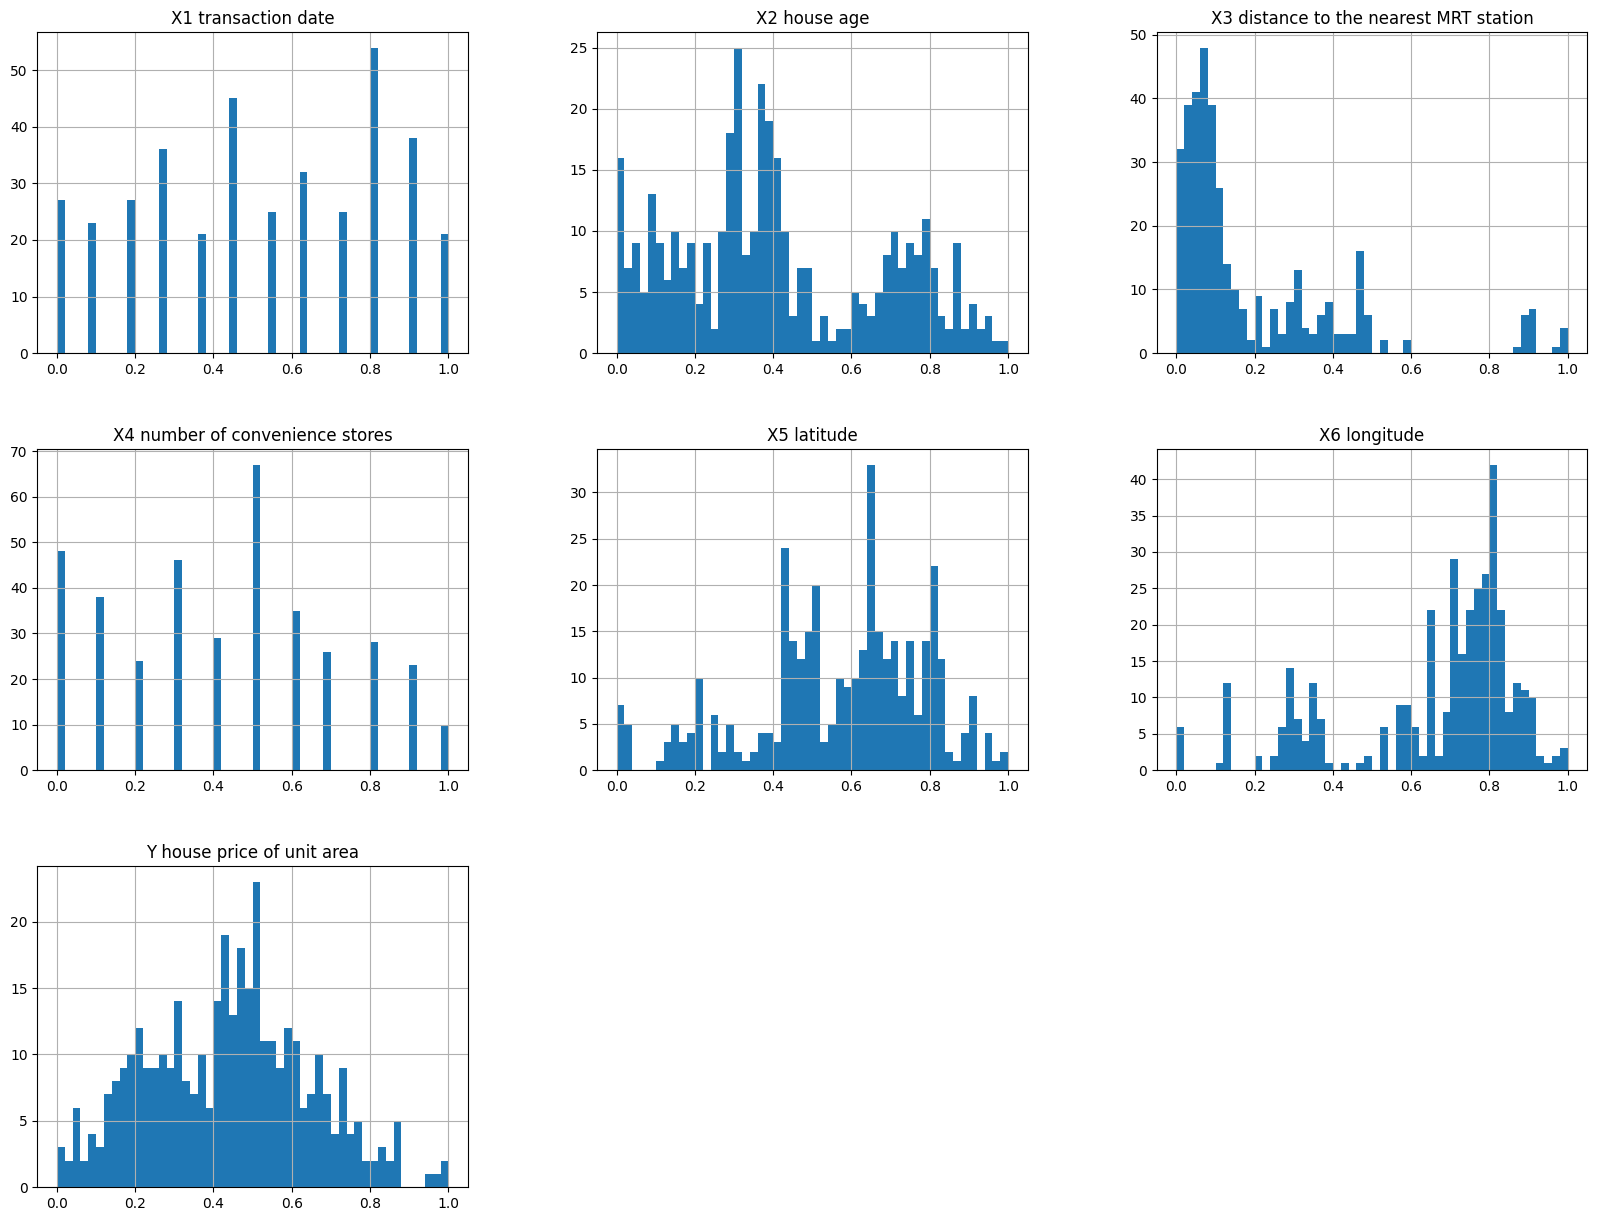

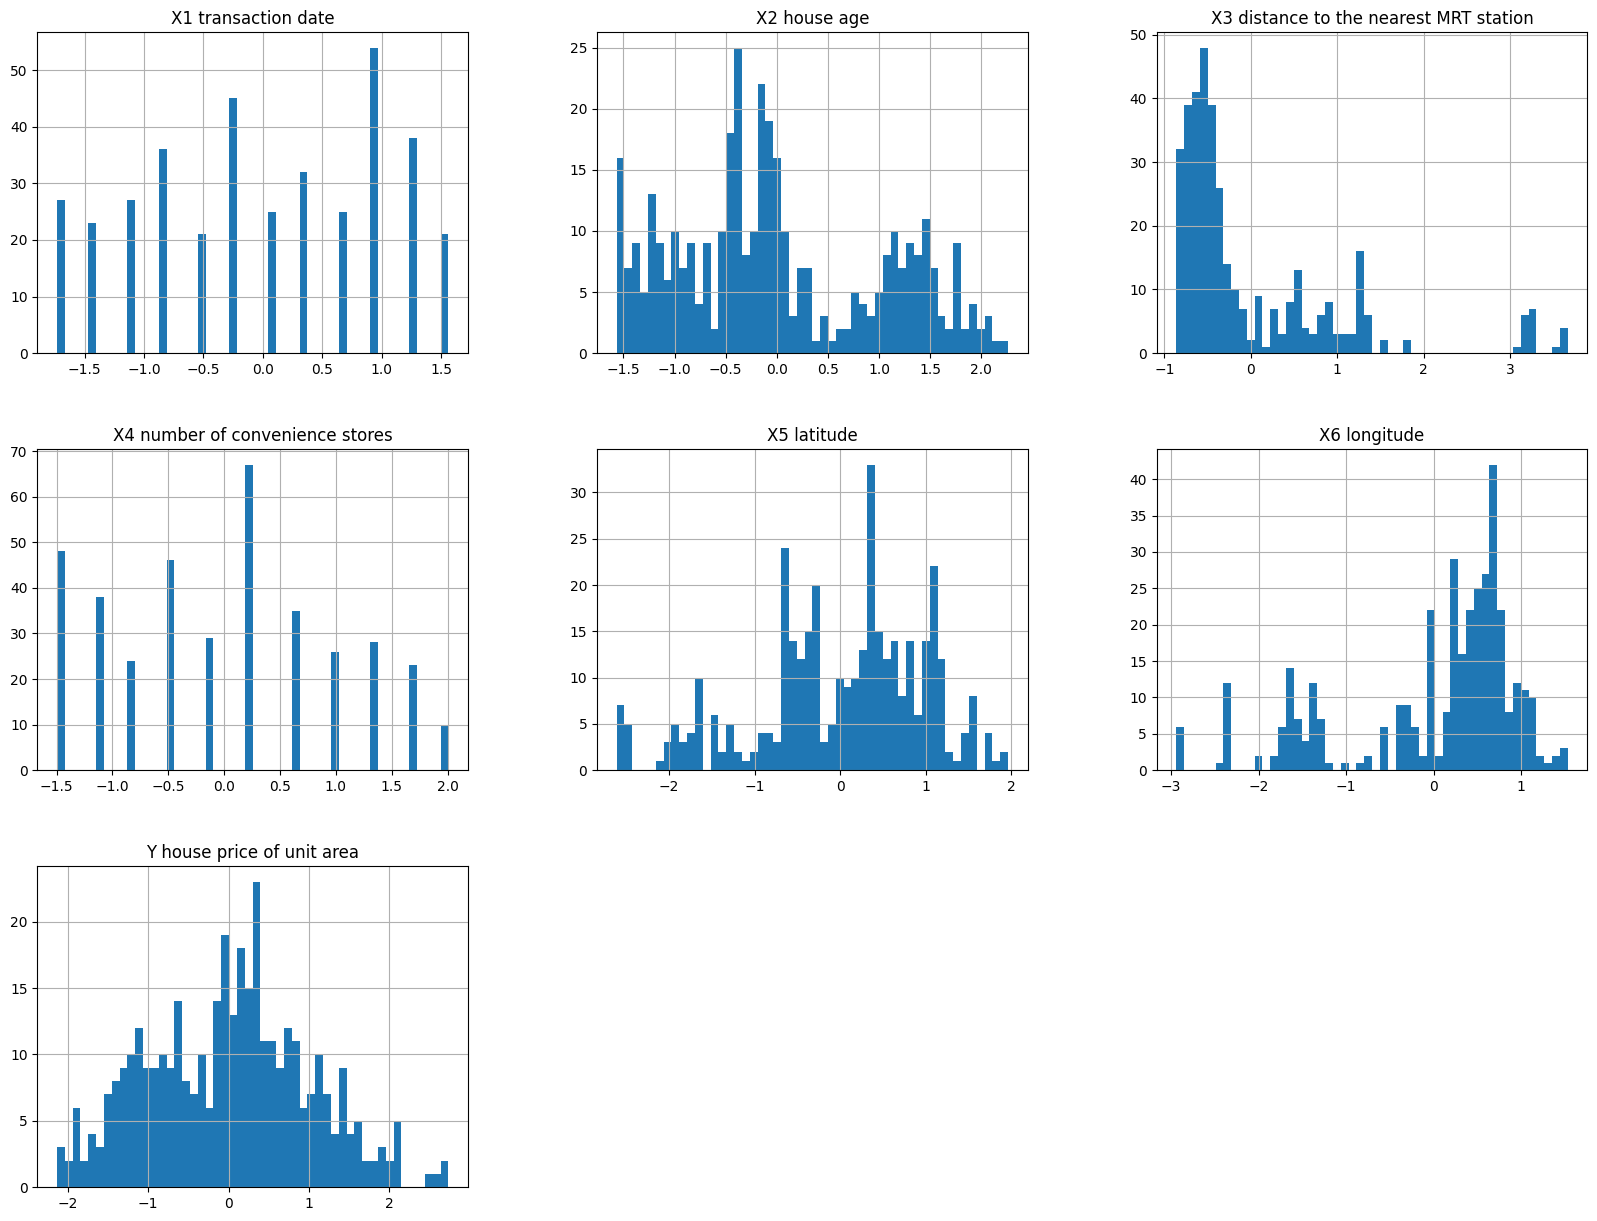

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()
df2.hist(bins=50, figsize=(20,15))
plt.show()
df3.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
# Normalise and standardizing data does not handle the skewness very well
from scipy import stats
left_skew,right_skew,norm_ = [],[],[]
for col in df.columns:
    skew_coef = df[col].skew()
    if (skew_coef<-0.05):
        print(col,"left skewed",df[col].skew())
        left_skew.append(col)
    elif (skew_coef>0.05):
        print(col,"right skewed",df[col].skew())
        right_skew.append(col)
    else: 
        print(col,"close to Gaussian")
        norm_.append(col)

X1 transaction date left skewed -0.16069422683263254
X2 house age right skewed 0.3645396599544711
X3 distance to the nearest MRT station right skewed 1.9781085730257213
X4 number of convenience stores right skewed 0.11981351549017594
X5 latitude left skewed -0.6324122763608309
X6 longitude left skewed -1.1710681599002761
Y house price of unit area right skewed 0.11477589746521465


In [24]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,2013.149086,17.922193,907.376269,4.272727,24.970101,121.534613,38.370856
std,0.278482,11.461621,989.071728,2.858683,0.010935,0.013197,11.946390
min,2012.667000,0.000000,57.589450,0.000000,24.941550,121.495870,12.900000
25%,2012.917000,9.100000,289.324800,2.000000,24.963590,121.530113,29.000000
50%,2013.167000,16.200000,489.350700,5.000000,24.972230,121.539415,39.200000
75%,2013.417000,28.350000,1360.139000,6.000000,24.978403,121.543480,46.350000
max,2013.583000,43.800000,4527.687000,10.000000,24.991560,121.554810,71.000000


In [25]:
#for boxcox, we need positive values. 
for i in df.index.values:
    df['X2 house age'].loc[i]
    if df['X2 house age'].loc[i] == 0:
        df['X2 house age'].loc[i] = 0.00001

for i in df.index.values:
    if df['X4 number of convenience stores'].loc[i] == 0:
        df['X4 number of convenience stores'].loc[i] = 0.00001

ogdf = df.copy()
for col in right_skew[:-1]: #not touching target variable
    df[col] = stats.boxcox(df[col])[0]

df.describe()

/var/folders/f8/9wxkqzrs2t928mrpswgscmw00000gn/T/ipykernel_45323/188949177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X2 house age'].loc[i] = 0.00001
/var/folders/f8/9wxkqzrs2t928mrpswgscmw00000gn/T/ipykernel_45323/188949177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X2 house age'].loc[i] = 0.00001
/var/folders/f8/9wxkqzrs2t928mrpswgscmw00000gn/T/ipykernel_45323/188949177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,2013.149086,5.501501,4.878802,1.444550,24.970101,121.534613,38.370856
std,0.278482,2.931467,0.582486,1.816664,0.010935,0.013197,11.946390
min,2012.667000,-2.130772,3.435409,-2.516354,24.941550,121.495870,12.900000
25%,2012.917000,3.864993,4.509375,0.796774,24.963590,121.530113,29.000000
50%,2013.167000,5.721975,4.828751,2.245303,24.972230,121.539415,39.200000
75%,2013.417000,8.071134,5.411037,2.601146,24.978403,121.543480,46.350000
max,2013.583000,10.372194,6.035021,3.745329,24.991560,121.554810,71.000000


In [26]:
for col in left_skew[1:]: #very little change observed in dates compared to how large the nmbers get
        # df[col] = stats.boxcox(df[col])[0]
        df[col] = df[col].pow(2) #Boxcox not working here

In [27]:
for col in df:
    skew = pd.Series(df[col]).skew()
    if (abs(skew)<0.4):
        print(col, skew)

X1 transaction date -0.16069422683263254
X3 distance to the nearest MRT station 0.018466835713890833
Y house price of unit area 0.11477589746521465


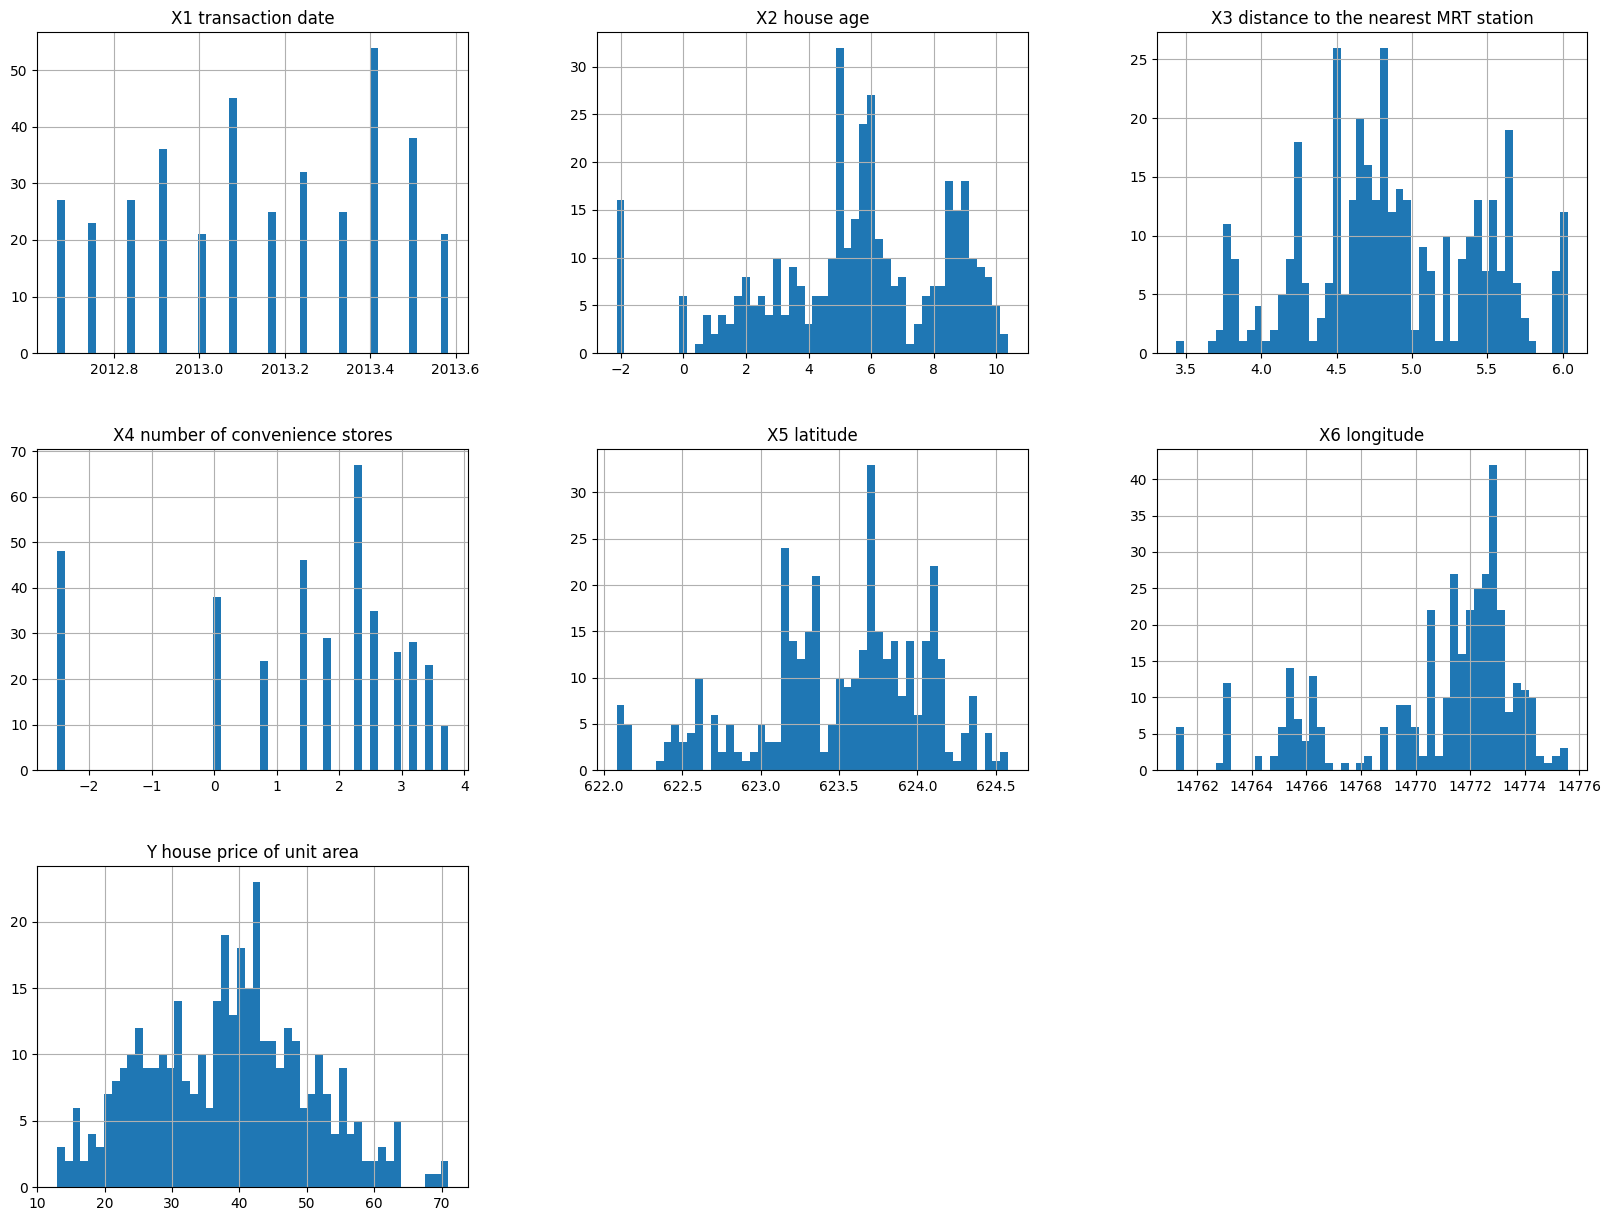

In [28]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [29]:
corr = df[df.columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.023399,0.095899,0.005207,-0.010686,-0.027827,0.057596
X2 house age,0.023399,1.000000,0.100849,0.016161,0.025762,-0.028831,-0.310312
X3 distance to the nearest MRT station,0.095899,0.100849,1.000000,-0.556275,-0.467833,-0.643941,-0.749126
X4 number of convenience stores,0.005207,0.016161,-0.556275,1.000000,0.484451,0.425010,0.541819
X5 latitude,-0.010686,0.025762,-0.467833,0.484451,1.000000,0.402688,0.595692
X6 longitude,-0.027827,-0.028831,-0.643941,0.425010,0.402688,1.000000,0.558174
Y house price of unit area,0.057596,-0.310312,-0.749126,0.541819,0.595692,0.558174,1.000000


In [30]:
# Splitting data into training and testing sets
def data_split(data, ratio):
    train_set = data.sample(frac = ratio, random_state=7)
    test_set = data.drop(train_set.index)
    test_set = test_set.sample(frac=1, random_state=7)
    return train_set, test_set

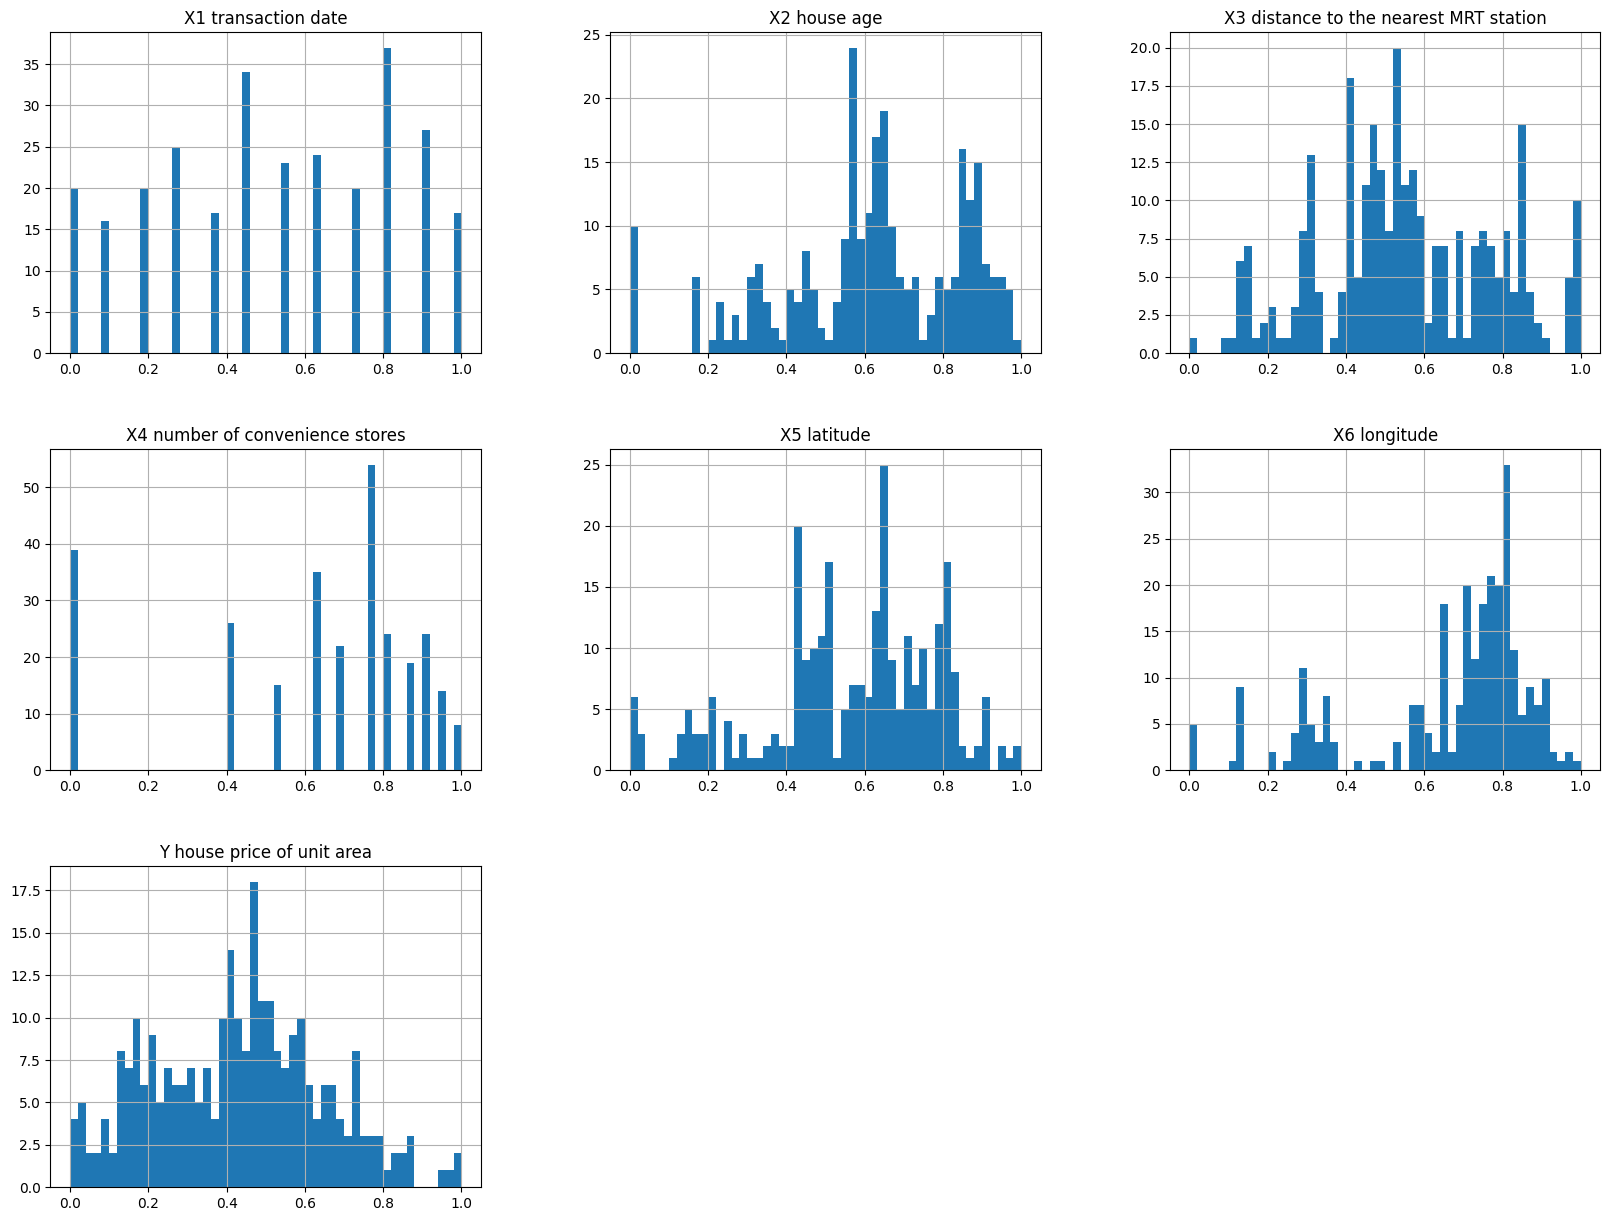

In [31]:
training_dataset, testing_dataset = data_split(df, 0.75)
trainog, testog = data_split(ogdf, 0.75) #index order will be preserved since we assigned seed = 7 and since ogdf is a copy of df
for column in training_dataset:
    normalize((training_dataset[column].values))
for column in testing_dataset:
    normalize(testing_dataset[column].values)
training_dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
training_dataset.shape, testing_dataset.shape

((280, 7), (94, 7))

2) Defining a function LR model

In [33]:
import random
def lr_model(features,labels,learning_rate,iterations):
    n = len(labels)
    w0=random.random()
    w1=np.random.rand(features.shape[1])
    w0_list, w1_list, mse = [], [], []
    for i in range(iterations):
        h = np.dot(features, w1) + w0
        loss = np.square(np.subtract(labels, h)).mean()
        dw1 = -(2*(features.T).dot(labels - h))/n
        dw0 = -2 * (np.sum(labels - h))/n
        w1 -= learning_rate*dw1
        w0 -= learning_rate*dw0
        w1_list.append(w1)
        w0_list.append(w0)
        mse.append(loss)
    print(f'MSE after {iterations} iterations at Lr = {learning_rate} is {mse[-1]}')    
    return w1_list, w0_list, mse

In [34]:
X_train = training_dataset.drop('Y house price of unit area', axis=1)
Y_train = training_dataset['Y house price of unit area'].copy()
X_test = testing_dataset.drop('Y house price of unit area', axis=1)
Y_test = testing_dataset['Y house price of unit area'].copy()

In [35]:
# save_model = pd.concat((X_train, Y_train), axis=1)
# save_model

In [36]:
# save_model.to_csv(index=False)
X_train.to_csv(r'./trainx.csv', index=False)
Y_train.to_csv(r'traint.csv', index=False)

In [37]:
X_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
212,0.727074,0.652898,0.818724,0.529111,0.903132,0.424780
15,1.000000,0.908825,0.574256,0.529111,0.816687,0.853719
378,0.727074,0.927647,0.577607,0.915650,0.584040,0.856265
125,0.545852,0.178217,0.315459,0.817272,0.482853,0.763784
109,1.000000,0.326388,0.853980,0.621298,0.428469,0.287870
...,...,...,...,...,...,...
186,0.545852,0.707540,0.857497,0.621298,0.433067,0.279897
199,0.818777,0.663216,0.517583,0.915650,0.557641,0.831829
107,0.727074,0.550047,0.759970,0.401865,0.209592,0.891561
216,0.636463,0.933440,0.578769,0.401865,0.599240,0.673852


In [38]:
Y_train.shape

(280,)

In [39]:
# Now we observe mse of the above model with lr 0.05 and 1k iterations
w1, w0, mse = lr_model(X_train, Y_train, 0.05, 1000)

MSE after 1000 iterations at Lr = 0.05 is 0.014585735935663886


In [40]:
X_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
212,0.727074,0.652898,0.818724,0.529111,0.903132,0.424780
15,1.000000,0.908825,0.574256,0.529111,0.816687,0.853719
378,0.727074,0.927647,0.577607,0.915650,0.584040,0.856265
125,0.545852,0.178217,0.315459,0.817272,0.482853,0.763784
109,1.000000,0.326388,0.853980,0.621298,0.428469,0.287870
...,...,...,...,...,...,...
186,0.545852,0.707540,0.857497,0.621298,0.433067,0.279897
199,0.818777,0.663216,0.517583,0.915650,0.557641,0.831829
107,0.727074,0.550047,0.759970,0.401865,0.209592,0.891561
216,0.636463,0.933440,0.578769,0.401865,0.599240,0.673852


In [41]:
print(w1[-1], w0[-1])

X1 transaction date                       0.080381
X2 house age                             -0.209663
X3 distance to the nearest MRT station   -0.206250
X4 number of convenience stores           0.137704
X5 latitude                               0.375519
X6 longitude                              0.210782
dtype: float64 0.18913932432899472


3) Using different learning rates and reporting MSE

MSE after 1000 iterations at Lr = 0.005 is 0.030010373980453572


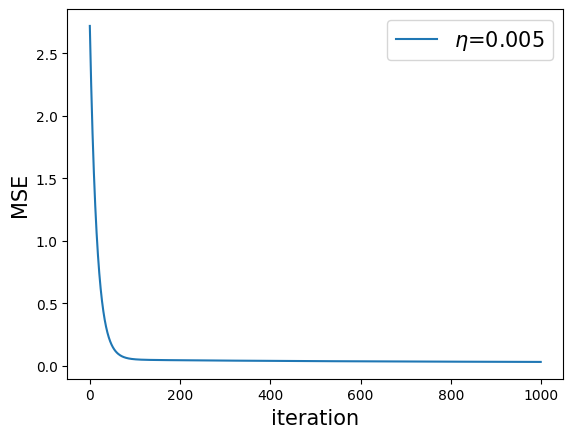

MSE after 1000 iterations at Lr = 0.01 is 0.026904146160529073


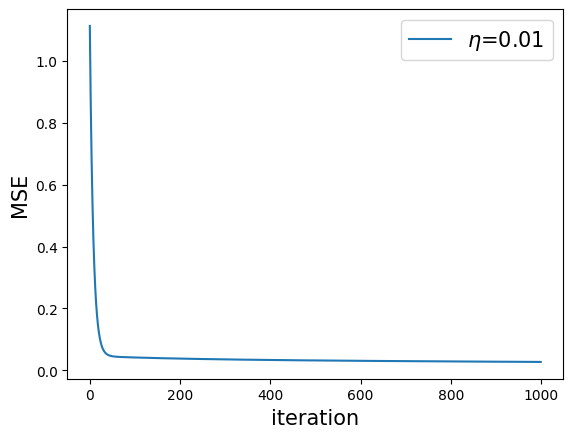

MSE after 1000 iterations at Lr = 0.1 is 0.01259711336712729


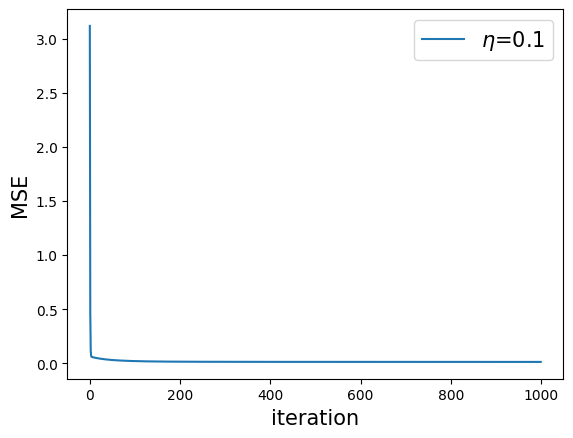

MSE after 1000 iterations at Lr = 0.5 is nan


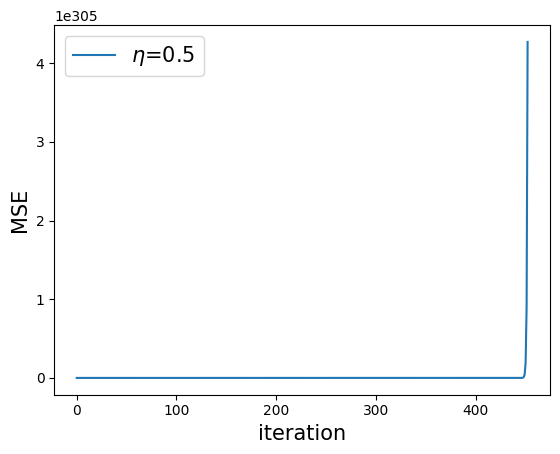

Best mse is 0.01259711336712729 for LR = 0.1


In [42]:
import warnings
#suppress warnings
warnings.filterwarnings('ignore')

lr_samples = [5e-3, 1e-2, 1e-1, 5e-1]
best_mse = 100
best_lr = 0
for i in lr_samples:
    w1, w0, mse = lr_model(X_train, Y_train, i, 1000)
    if mse[-1] < best_mse:
        best_mse = mse[-1]
        best_lr = i
    plt.plot(mse, label=f'$\eta$={i}')
    plt.xlabel('iteration', fontsize=15)
    plt.ylabel('MSE', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

print(f'Best mse is {best_mse} for LR = {best_lr}')

4) Using the best model we obtained

In [43]:
# We have found the model works best at LR = 0.1.
# Now we train out model with trainset using above hyperparameter

In [44]:
w1_best, w0_best, mse_best = lr_model(X_train, Y_train, best_lr, 1000)

MSE after 1000 iterations at Lr = 0.1 is 0.012731200078781656


In [45]:
w1_best[-1]

X1 transaction date                       0.072738
X2 house age                             -0.234194
X3 distance to the nearest MRT station   -0.388636
X4 number of convenience stores           0.102949
X5 latitude                               0.305965
X6 longitude                              0.105540
dtype: float64

In [46]:
def mse(preds, test):
    mse = np.square(np.subtract(preds, test)).mean()
    return mse

def predict(X, w1, w0, Y):
    y = np.dot(X, w1[-1]) + w0[-1]
    print(f'Mse is {mse(y, Y)}')
    return y

def normal(ogdata, data):
    max_value = max(ogdata)
    min_value = min(ogdata)
    for i in range(len(data)):
        data[i] =data[i]*(max_value - min_value) + min_value
    return data

In [47]:
# We are only using y test for mse
y_preds = predict(X_test, w1_best, w0_best, Y_test)

Mse is 0.013676406682915313


In [48]:
# This is the mse we get when we used the model trained on training set
# on test set
lrmse = mse(y_preds, Y_test)

### Question 2

1) Linear regression model training with scikit learn

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

2. Predicting with the trained model

In [50]:
lrpreds = reg.predict(X_test)
skmse = mean_squared_error(Y_test, lrpreds)

In [51]:
lrpreds #model predictions

array([ 0.3860718 ,  0.05335027,  0.48473943,  0.785439  ,  0.48085362,
        0.43392762,  0.51045195,  0.55051789,  0.46284091,  0.40635413,
        0.42296285,  0.63773798,  0.63280557,  0.38028364,  0.50054918,
        0.38982963,  0.00808937,  0.36818744,  0.64764185,  0.63329872,
        0.41322152,  0.6969829 ,  0.79190919,  0.64760586,  0.64509941,
        0.52204097,  0.26956953,  0.59930893,  0.54248582,  0.30728126,
        0.20254733,  0.46402786,  0.43312964,  0.20254733,  0.63312237,
        0.63460112,  0.27293567,  0.46140479,  0.77496921,  0.34411124,
        0.53000974,  0.5424636 ,  0.3333827 ,  0.52643423,  0.60703613,
        0.488649  ,  0.32606653,  0.29175976,  0.6105763 ,  0.58296518,
        0.28999706,  0.20339127,  0.82095888,  0.66834259, -0.04659301,
        0.3744639 ,  0.21934424,  0.15588474,  0.49280552,  0.22892413,
        0.23295519,  0.71307076,  0.60911702,  0.29552804,  0.43339865,
        0.42613014,  0.59612152,  0.82669673,  0.28124106,  0.23

In [52]:
y_preds #our predictions

array([ 0.38397312,  0.04561456,  0.50036069,  0.75312903,  0.46909387,
        0.4418013 ,  0.51288262,  0.55793162,  0.48121322,  0.40547632,
        0.43623184,  0.61576508,  0.60448044,  0.38249512,  0.50077951,
        0.42059582, -0.00708519,  0.36436861,  0.64911736,  0.61855484,
        0.42388175,  0.69200666,  0.75979929,  0.64647745,  0.64364494,
        0.53890974,  0.27246221,  0.60469414,  0.54926982,  0.30915779,
        0.22374027,  0.46209329,  0.43371525,  0.22374027,  0.63124056,
        0.64225064,  0.27420179,  0.46745355,  0.74218655,  0.35743303,
        0.54174611,  0.54614323,  0.33263156,  0.53464225,  0.60122669,
        0.47161964,  0.33012719,  0.29314939,  0.61062383,  0.54750137,
        0.28901533,  0.20546847,  0.78993969,  0.61751705, -0.06365695,
        0.38094906,  0.23770914,  0.15748574,  0.4985816 ,  0.23061839,
        0.2310376 ,  0.71077392,  0.61512468,  0.29435593,  0.43042113,
        0.42653829,  0.55830231,  0.79590205,  0.27889165,  0.23

3. Comparing our model to sklearn

In [53]:
print(f'''Comparison between our model and sklearn:
    mse of our model = {lrmse}
    mse of sklearn model = {skmse}
Difference between the two = {abs(lrmse-skmse)}''')

Comparison between our model and sklearn:
    mse of our model = 0.013676406682915313
    mse of sklearn model = 0.013418624913697875
Difference between the two = 0.00025778176921743834


In [54]:
# Turning normalised predicted target values back to normal
_ = normal(testog['Y house price of unit area'], y_preds)
_

array([32.21384782, 15.19441223, 38.06814253, 50.78239021, 36.49542182,
       35.12260515, 38.6979956 , 40.96396048, 37.10502501, 33.29545884,
       34.84246149, 43.87298367, 43.30536625, 32.13950445, 38.08920933,
       34.05596989, 12.54361488, 31.22774084, 45.55060319, 44.01330837,
       34.2212519 , 47.7079352 , 51.11790409, 45.41781556, 45.27534032,
       40.00715992, 26.60484914, 43.31611514, 40.5282718 , 28.45063679,
       24.15413541, 36.14329261, 34.71587697, 24.15413541, 44.65139998,
       45.20520701, 26.69235021, 36.41291358, 50.23198361, 30.8788813 ,
       40.14982948, 40.37100453, 29.63136761, 39.79250523, 43.14170248,
       36.6224677 , 29.50539781, 27.6454143 , 43.61437861, 40.43931897,
       27.4374709 , 23.23506401, 52.63396662, 43.96110757,  9.69805553,
       32.0617379 , 24.8567695 , 20.82153255, 37.97865465, 24.50010496,
       24.5211913 , 48.65192807, 43.84077141, 27.70610338, 34.55018287,
       34.35487624, 40.98260625, 52.93387331, 26.92825019, 24.69